In [1]:

from src.class_item import Item
import numpy as np
from src.class_packing import Packing

In [2]:
from copy import copy
from matplotlib import pyplot as plt, patches


def draw_segments(item, h):

    n_x1 = 0
    n_y1 = 0
    for point in item.points:
        if point[0] > n_x1:
            n_x1 = copy(point[0])
        if point[1] > n_y1:
            n_y1 = copy(point[1])
    pallet_width = n_x1
    pallet_height = n_y1

    fig, ax = plt.subplots()

    ax.set_xlim(-0.5, pallet_width + 2)
    ax.set_ylim(-0.5, pallet_height + 2)

    for i in range(len(item.segments)):
        plt.plot([0, pallet_width], [i*h, i*h], color = 'black', linestyle=':')

    figure = patches.Polygon(item.points,
                                linewidth=1,
                                edgecolor='red',
                                fill=False)
    ax.add_patch(figure)

    for i in range(len(item.segments)):
        for sigment in item.segments[i]:
            if sigment[0] != sigment[1]:
                plt.plot(sigment, [i*h, i*h], color = 'blue')
            else:
                ax.scatter(sigment[0], i*h, color = 'blue', s = 4)
    # plt.savefig('swim_to_sigments ' + str(item.id) + ' with h = ' + str(h) + '.png')
    plt.show()

In [3]:
import math
from src.class_polygon import Polygon

# input_file_name = 'shirts.txt'
# input_file_name = 'swim.txt'
# input_file_name = 'trousers.txt'

# width= 5752
# height = 10000

width = 79
height = 400

# width = 40
# height = 80

# num_rot=4
# num_sort=2
eps=0.0

"""Входные данные типа swim.txt (trousers.txt)"""
# ------------  чтение файла  ------------
# path = 'shirts.txt'
# path = 'swim.txt'
path = 'trousers.txt'
# path = "src\\input\\" + input_file_name
f = open(path, 'r')
line = f.readline()
polygons = []
while line:
    f.readline()  #QUANTITY
    quantity = int(f.readline().split(' ')[0][:-1])
    f.readline()  #NUMBER OF VERTICES
    num_verties = int(f.readline().split(' ')[0][:-1])
    f.readline()  #VERTICES (X,Y)
    polygon = []
    for _ in range(num_verties):
        line = f.readline()
        list_point = (''.join([
            line[i] for i in range(len(line) - 1)
            if not ((line[i] == ' ') and (line[i + 1] == ' '))
        ])).split(' ')
        point = [float(list_point[-2]), float(list_point[-1])]
        polygon.append(copy(point))
    for _ in range(quantity):
        polygons.append(copy(polygon))

    f.readline()  #
    line = f.readline()  #PIECE k
f.close()

# width = 100
# height = 100
# #
# path = 'concave15/test22.txt'
# f = open(path, 'r')
# num_items = int(f.readline())
# polygons = np.full(num_items, None)
# list_pallet_shape = f.readline().split(' ')
# for i in range(num_items):
#     list_points = f.readline().split(' ')
#     points = []
#     for j in range(0, len(list_points) - 1, 2):
#         point = [float(list_points[j]), float(list_points[j + 1])]
#         points.append(point)
#     if (points[0][0] == points[-1][0] and points[0][1] == points[-1][1]):
#         points.pop()
#     polygons[i] = np.array(points)
# f.close()
#
# ------------  Упаковка  ------------
packing = Packing(width=width,
                    height=height,
                    drill_radius=0,
                    border_distance=0)

packing.polygons = copy(polygons)
packing.num_items = len(polygons)

packing.items = np.full(packing.num_items, None)
def add_items_in_order(packing, permutation = None):
    if permutation is None:
        permutation = [n for n in range(packing.num_items)]
    # print('======')
    # print(permutation)
    # print('======')
    pack = copy.deepcopy(packing)
    for i in range(packing.num_items):
        num = permutation[i]
        # print('mun', num)
        pack.items[i] = copy.deepcopy(packing.items[num])
    #     print(pack.items[i].id )
    # print('-----')
    return pack


for id in range(packing.num_items):
        rotated_points = copy(polygons[id])
        new_points = Polygon(rotated_points)
        new_points.rotate(3*math.pi/2)
        new_points.move_to_origin()
        points1 = new_points.points_to_list()

        item = Item(id, copy(points1))
        packing.items[id] = copy(item)
        packing.items[id].rotation = 0

# # for item in packing.items:
# #     print(item.rotation)
# for item in packing.items:
#     print(item.points)

In [4]:
from datetime import datetime
from src.greedy_alg.class_pallets import Pallets

h = 1

# packing = Packing(width=width, height=height, drill_radius=0)

pallets = Pallets([width, height])
pallets.grid_step = h
pallets.add_pallet_lines()

packing.pallets = copy(pallets)
packing.h = h
packing.add_segments_for_items()

packing.set_squares()

# packing.sort_items(num_sort=2)

# for item in packing.items:
#     print(item.rotation)

# for item in packing.items:
#     draw_segments(item, h)

In [5]:
# start_time = datetime.now()
# max_height = packing.segments_bottom_left()
# print(max_height)
# print(datetime.now() - start_time)

In [6]:
# packing.draw_segments_packing()

In [7]:
# permutations = [i for i in range(len(packing.items))]
# newPermutation = list(np.random.permutation(permutations))
#
# pack = copy(packing)
# packing = add_items_in_order(packing, newPermutation)
# new_height = packing.segments_bottom_left()

In [8]:

from scipy import rand
import copy
import time

permutations = [i for i in range(len(packing.items))]
# permutation = list(np.random.permutation(permutations))
minPermutation = []

k = len(packing.items)
pack = copy.deepcopy(packing)
pack.sort_items(num_sort=2)
# for item in pack.items:
#     print(item.id)

for item in pack.items:
    minPermutation.append(item.id)
# print('----', minPermutation)
times = []
pr = 0.95
T0 = pr
T=3.5*T0
outs_func = []
time_count = 0
it = 0
counter_t = 0
height = len(packing.pallets.pallet_lines)
min_pack = copy.deepcopy(packing)
min_height = len(packing.pallets.pallet_lines)
start_time = time.time()

while counter_t < 15:
    permutation = minPermutation
    print('min: ', minPermutation)
    # for i in range(k*k):
    for i in range(k):
        newPermutation = permutation
        pack = copy.deepcopy(packing)
        pack = add_items_in_order(pack, newPermutation)
        new_height = pack.segments_bottom_left()
        # for item in pack.items:
        #     print(item.id)
        # print('======')
        # если рекорд, то запоминаем
        if new_height < min_height:
            min_height = new_height
            minPermutation = newPermutation
            min_pack = copy.deepcopy(pack)
        # если меньше текущего значения, то обновляем перестановку
        if new_height < height:
            height = new_height
            permutation = newPermutation
        else:
            # если нет, то обновляем с некоторой вероятностью
            p = math.exp((height - new_height)/T)
            # print(p)
            value = rand(1)
            # if p > 1 - p:
            if value <= p:
                print('else')
                height = new_height
                permutation = newPermutation

        # получаем новую перестановку
        a = 0
        b = 0
        while a == b:
            a = np.random.randint(0,k)
            b = np.random.randint(0,k)
            te = 0
        te = permutation[a]
        permutation[a] = permutation[b]
        permutation[b] = te
        print(height)
        outs_func.append(height)
    counter_t += 1
    T = T * pr
work_time = time.time() - start_time
print(work_time)

min:  [8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 16, 17, 18, 19, 44, 45, 46, 47, 48, 49, 50, 51, 37, 28, 29, 30, 31, 32, 33, 34, 35, 39, 52, 53, 54, 55, 56, 57, 58, 59, 42, 43, 36, 38, 40, 41, 20, 21, 22, 23, 24, 25, 26, 27, 60, 61, 62, 63]
295


C:\Users\79833\AppData\Local\Temp/ipykernel_19448/19998034.py:56: DeprecationWarning: scipy.rand is deprecated and will be removed in SciPy 2.0.0, use numpy.random.rand instead
  value = rand(1)


else
297
297
296
else
300
300
300
300
300
300
300
300
300
300
300
300
else
304
else
304
else
304
else
304
304
304
else
305
else
306
304
else
304
304
304
304
else
310
else
310
else
310
else
310
310
else
310
else
310
306
else
306
306
306
306
306
306
else
306
306
306
298
else
298
else
298
else
298
else
298
298
298
298
298
298
298
298
298
298
298


KeyboardInterrupt: 

In [ ]:
from src.smth2lines.segments_bottom_left import pack_segments
# import copy

# kf = copy.deepcopy(packing)
# for i in range(1):
#     # permutation = list(np.random.permutation(permutations))
#     pack = copy.deepcopy(packing)
#     print('+++++')
#     for item in pack.items:
#         print(item.id)
#     print('======')
#     pack = add_items_in_order(pack, minPermutation)
#     for item in pack.items:
#         print(item.id)
#     # new_height = pack.segments_bottom_left()
#     # pack.pallets.add_pallet_lines()
#     # for item in packing.items:
#         # item.t_vector = None
#     #     print(item.t_vector)
#     # print('======')
#     # print(pack.pallets.pallet_lines)
#     # print('-------')
#     new_height = pack.segments_bottom_left()
#     pack.draw_segments_packing()
#     print(new_height)

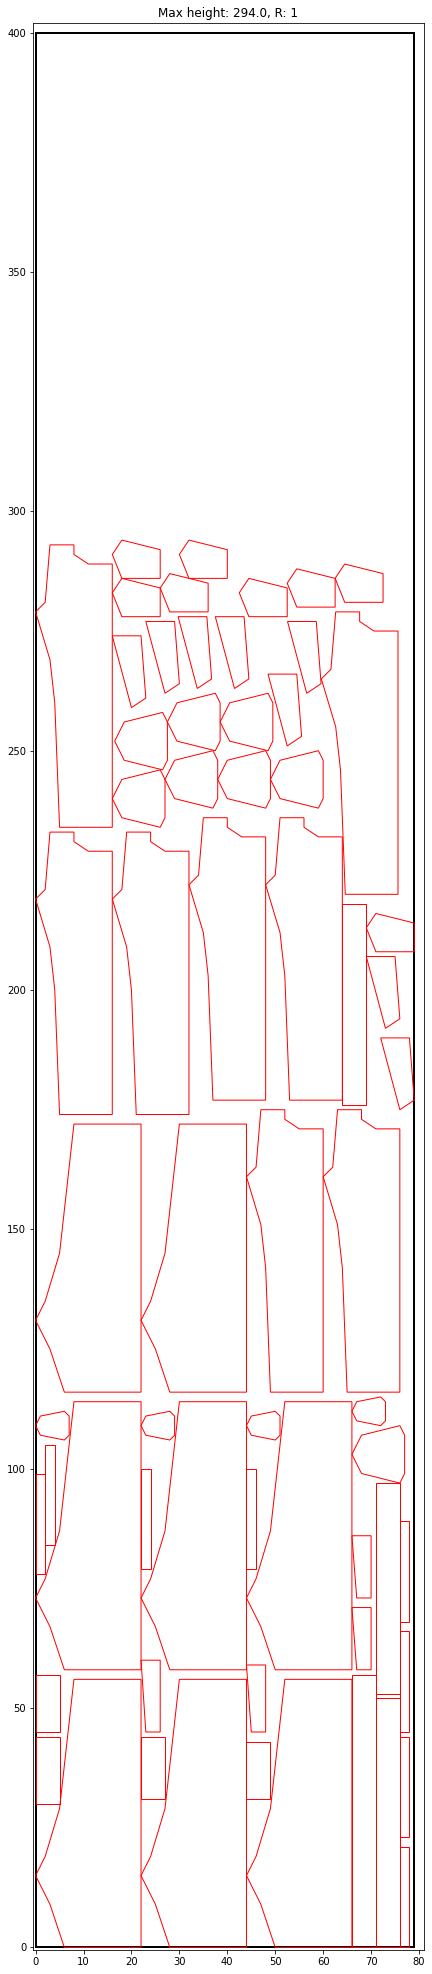

In [9]:
# print(new_height)
min_pack.draw_segments_packing()


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 10)
ax.plot(outs_func, linestyle = ':', color = 'black', label = 'objective function')
# ax.plot(outs_clean, color = 'black',  label = 'objective function')
# ax.plot(outs_func, linestyle = ':', color = 'black', label = 'целевая функция со штрафом')
# ax.plot(outs_clean, color = 'black',  label = 'целевая функция')
# ax.set(xlabel='iterations', ylabel='function',
#            title='')
# plt.xlabel('номер итерации', fontsize=20)
# plt.ylabel('значение функции', fontsize=20)

plt.xlabel('number of iteration', fontsize=20)
plt.ylabel('value of the function', fontsize=20)

ax.grid()
plt.legend(loc='best', frameon=False, prop={'size': 20})
fig.savefig("Plot.png")
# fig.savefig("Plot.eps")
plt.show()